In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets

from collections import deque
import math
import heapq

import time
import random
import bisect

# Exercício sobre Algoritmos genéticos

## Construindo um algoritmo genético

Queremos analisar o algoritmo genético, mas em um contexto diferente dos vistos anteriormente.

Imagine que você conseguiu achar uma brecha em um sistema de login, cujas senhas tem sempre 17 caracteres maiúsculos ou minúsculos, incluindo o espaço. A brecha encontrada diz quantos dos caracteres da senha colocada estão na posição correta, mas não diz quais que estão corretos.

Ou seja, se a senha de uma pessoa é abcdefghijklmnopq e você inseriu abc**z**efghi**a**klmnopq, o sistema lhe diz que você acertou 15.

Apesar de ser uma falha muito grave, você deve acertar uma senha dentre 53¹⁷=205442259656281392806087233013.

Com isso, queremos construir um algoritmo genético que consiga podar este espaço de busca imenso e acertar uma senha, que por acaso é **Genetic Algorithm**.

In [0]:
target = 'Genetic Algorithm'

Agora vamos definir os genes do algoritmo genético, que são todos os caracteres aceitos:

In [0]:
# The ASCII values of uppercase characters ranges from 65 to 91
u_case = [chr(x) for x in range(65, 91)]
# The ASCII values of lowercase characters ranges from 97 to 123
l_case = [chr(x) for x in range(97, 123)]

gene_pool = []
gene_pool.extend(u_case) # adds the uppercase list to the gene pool
gene_pool.extend(l_case) # adds the lowercase list to the gene pool
gene_pool.append(' ')    # adds the space character to the gene pool
print(gene_pool)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']


Agora vamos inicializar o tamanho da população, a taxa de mutação:

In [0]:
max_population = 100
mutation_rate = 0.07

E criar nossa função de fitness:

In [0]:
def fitness_fn(sample):
    # initialize fitness to 0
    fitness = 0
    for i in range(len(sample)):
        # increment fitness by 1 for every matching character
        if sample[i] == target[i]:
            fitness += 1
    return fitness

***testing fitnes_fn***

In [0]:
print(fitness_fn('G2345678901234567'))
print(fitness_fn('Genetic Algorithm'))


1
17


E inicializar nossa população:


In [0]:
def init_population(pop_number, gene_pool, state_length):
    """Initializes population for genetic algorithm
    pop_number  :  Number of individuals in population
    gene_pool   :  List of possible values for individuals
    state_length:  The length of each individual"""
    g = len(gene_pool)
    population = []
    for i in range(pop_number):
        new_individual = [gene_pool[random.randrange(0, g)] for j in range(state_length)]
        population.append(new_individual)

    return population

In [0]:
population = init_population(max_population, gene_pool, len(target))

In [0]:
print(population)

[['I', 'n', 'B', 'r', 'c', 'n', 'H', 'r', 'E', 'i', 'f', 's', ' ', 't', 'R', 'g', 'J'], ['d', 'q', 'v', 'J', 'L', 'h', ' ', 'q', 'G', 'D', 'F', 'h', 'v', 'G', 'O', 'Q', 'S'], ['D', 'z', 'O', 'f', 'Y', 'c', 'V', 'd', 'Q', 'H', 'F', 'R', 'G', 'u', 'Q', 'J', 'o'], ['c', 'd', 'M', 'K', 'u', 'D', 'u', 'F', 'u', 'y', 'N', 'X', 'E', 'o', 'I', 'z', 'o'], ['q', 'e', 'C', 'b', 'b', 'A', 'u', 'N', 'W', 'L', 'O', 'v', 'N', 'y', 'M', 'U', 'k'], ['B', 'a', 'D', 'p', 'G', 'A', 'b', 'R', 'w', 'Q', 'D', 'Y', 'M', 'e', 'g', 'f', 'T'], ['I', 'z', 'I', 'J', 'o', 'b', 'w', 'y', 'V', 'b', 's', 'u', 'A', 'O', 'F', 'W', 'z'], ['t', 'p', 'S', 'C', 'G', 'V', 'p', 'b', 'E', 'd', 'Z', 'x', 'S', 'D', 'A', 'Q', 'J'], ['X', 'C', 'K', 'Z', 'G', 'n', 'T', 'z', 'h', 'w', 'P', 't', 'A', 'B', 'U', 'k', 'D'], ['v', 'A', 'n', 'S', 'j', 'x', 'I', 'e', 'V', 'L', 'p', 'n', 'I', 'y', 'X', 'M', 'B'], ['h', 'e', 'M', 'e', 'c', 'm', 'S', 'i', 'p', 'M', 'n', 'O', 'x', 'S', 'a', 'B', 'A'], ['W', 'D', 'm', 'u', 'h', 'H', 'L', 'h', '

***testing gene pool***

In [0]:
g = len(gene_pool)
state_length=17
lista=[random.randrange(0, g) for j in range(state_length)]
print(lista)
ind=[gene_pool[j] for j in lista]
print(ind)
st=''.join(ind)
print(st)



[48, 21, 51, 15, 26, 41, 21, 11, 36, 42, 36, 5, 18, 0, 28, 19, 24]
['w', 'V', 'z', 'P', 'a', 'p', 'V', 'L', 'k', 'q', 'k', 'F', 'S', 'A', 'c', 'T', 'Y']
wVzPapVLkqkFSAcTY


Agora vamos selecionar dois dos indivíduos mais propícios para cruzar:

In [0]:
def weighted_sampler(seq, weights):
    """Return a random-sample function that picks from seq weighted by weights."""
    totals = []
    for w in weights:
        totals.append(w + totals[-1] if totals else w)

    return lambda: seq[bisect.bisect(totals, random.uniform(0, totals[-1]))]

def select(r, population, fitness_fn):
    fitnesses = map(fitness_fn, population)
    sampler = weighted_sampler(population, fitnesses)
    return [sampler() for i in range(r)]



In [0]:
parents = select(2, population, fitness_fn) 
print(parents)

[['c', 'I', 'B', 't', 'U', 'D', 'M', 'b', 'b', 'T', 'e', 'U', 'r', 'X', 'I', 'f', 'C'], ['N', 'C', 'q', 't', 'v', 'l', 'v', 'e', 'C', 'p', 'L', 'y', 'J', 'F', 't', 'Z', 'l']]


***testing weighted_sampler and select***
Note: bissect.bissect(x,a) returns an insertion point which comes after (to the right of) any existing entries of x in a

> Indented block



In [0]:
weights=[0 for i in range(96)]
weights.append(0.25);
weights.append(0.25);
weights.append(0.25);
weights.append(0.25);

print(len(weights))
print(weights)
totals = []
for w in weights:
        totals.append(w + totals[-1] if totals else w)
print(totals)

print(''.join(population[96]))
print(''.join(population[97]))
print(''.join(population[98]))
print(''.join(population[99]))      
print('-----')
r=weighted_sampler(population,weights)
for i in range(10):
  print(''.join(r()))
  


100
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.25, 0.25, 0.25, 0.25]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.25, 0.5, 0.75, 1.0]
ImphkWxoMaZuhVVqv
FVRAEvHLSkGYoVCzV
CnoKpkChpDkgtQwnU
imOCLtlGnaoXWtkJU
-----
CnoKpkChpDkgtQwnU
imOCLtlGnaoXWtkJU
CnoKpkChpDkgtQwnU
FVRAEvHLSkGYoVCzV
FVRAEvHLSkGYoVCzV
CnoKpkChpDkgtQwnU
CnoKpkChpDkgtQwnU
ImphkWxoMaZuhVVqv
CnoKpkChpDkgtQwnU
imOCLtlGnaoXWtkJU


E vamos recombinar os indivíduos selecionados para gerar seus filhos, os quais poderão sofrer mutação:

In [0]:
def recombine(x, y):
    n = len(x)
    c = random.randrange(0, n)
    return x[:c] + y[c:]

def mutate(x, gene_pool, pmut):
    if random.uniform(0, 1) >= pmut:
        return x

    n = len(x)
    g = len(gene_pool)
    c = random.randrange(0, n)
    r = random.randrange(0, g)

    new_gene = gene_pool[r]
    return x[:c] + [new_gene] + x[c+1:]

child = recombine(*parents)
child = mutate(child, gene_pool, mutation_rate)

***test recombine and mutate***

In [0]:
i1=r()
i2=r()
print(''.join(i1))
print(''.join(i2))
i3=recombine(i1,i2)
print(''.join(i3))
i4=mutate(i3,gene_pool,0.99)
print()
print(''.join(i4))
def diff(first, second):
        second = set(second)
        return [item for item in first if item not in second]
print(diff(i3,i4))


CnoKpkChpDkgtQwnU
imOCLtlGnaoXWtkJU
CnoCLtlGnaoXWtkJU

CnoCLtlGnamXWtkJU
[]


Agora precisamos fazer este processo para toda a população e gerar uma população com fitness decrescente:

In [0]:
population = [mutate(recombine(*select(2, population, fitness_fn)), gene_pool, mutation_rate) for i in range(len(population))]

Para o algoritmo não ficar rodando eternamente, vamos definir o número de gerações e um limiar do fitness para indicar que o algoritmo chegou a uma solução:

In [0]:
ngen = 2000 # maximum number of generations
# we set the threshold fitness equal to the length of the target phrase
# i.e the algorithm only terminates whne it has got all the characters correct 
# or it has completed 'ngen' number of generations
f_thres = len(target)

argmax = max
argmin = min

def fitness_threshold(fitness_fn, f_thres, population):
    if not f_thres:
        return None

    fittest_individual = argmax(population, key=fitness_fn)
    if fitness_fn(fittest_individual) >= f_thres:
        return fittest_individual

    return None

Por último, vamos criar o algoritmo genético integrando todos os passos acima:

In [0]:
def genetic_algorithm_stepwise(population, fitness_fn, gene_pool=[0, 1], f_thres=None, ngen=1200, pmut=0.1):
    fitness_generation = []
    for generation in range(ngen):
        population = [mutate(recombine(*select(2, population, fitness_fn)), gene_pool, pmut) for i in range(len(population))]
        # stores the individual genome with the highest fitness in the current population
        current_best = ''.join(max(population, key=fitness_fn))
        fitness_generation.append(fitness_fn(current_best))
        print(f'Current best: {current_best}\t\tGeneration: {str(generation)}\t\tFitness: {fitness_fn(current_best)}\r', end='')
        
        # compare the fitness of the current best individual to f_thres
        fittest_individual = fitness_threshold(fitness_fn, f_thres, population)
        
        # if fitness is greater than or equal to f_thres, we terminate the algorithm
        if fittest_individual:
            return fittest_individual, generation,fitness_generation
    return max(population, key=fitness_fn) , generation, fitness_generation

In [0]:
population = init_population(max_population, gene_pool, len(target))
solution, generations,fitness = genetic_algorithm_stepwise(population, fitness_fn, gene_pool, f_thres, ngen, mutation_rate)

Vemos que em um certo número gerações o algoritmo genético conseguiu chegar na solução exata.

In [0]:
print("Melhor solução: {}		Generation: {}		Fitness: {}".format("".join(solution), generations, fitness_fn(solution)))

Melhor solução: Genetic ALgorithm		Generation: 1199		Fitness: 16


In [0]:
print(fitness)
print(len(fitness))

[3, 3, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 13, 14, 13, 14, 14, 13, 13, 13, 13, 13, 13

## Agora é sua vez

Modifique o código do algoritmo genético para guardar em cada geração o fitness da mesma.

Após isso, varie a população entre 50 e 100 indivíduos e para cada população, varie a taxa de mutação em 0.07, 0.14, 0.21.

Por último, plote 6 gráficos de linhas - uma para cada combinação de tamanho da população e taxa de mutação - mostrando a evolução do fitness ao longo das gerações. E responda: **Aumentar a taxa de mutação faz o algoritmo genético convergir mais rápido? O que dizer de aumentar o tamanho da população?**


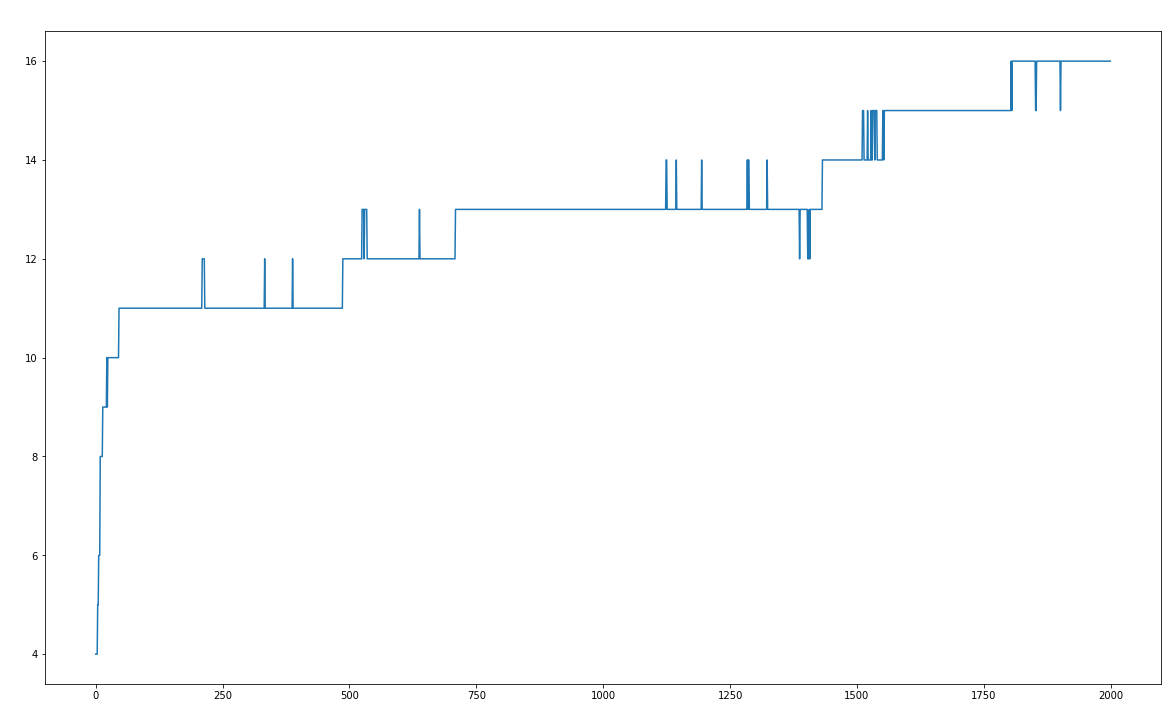

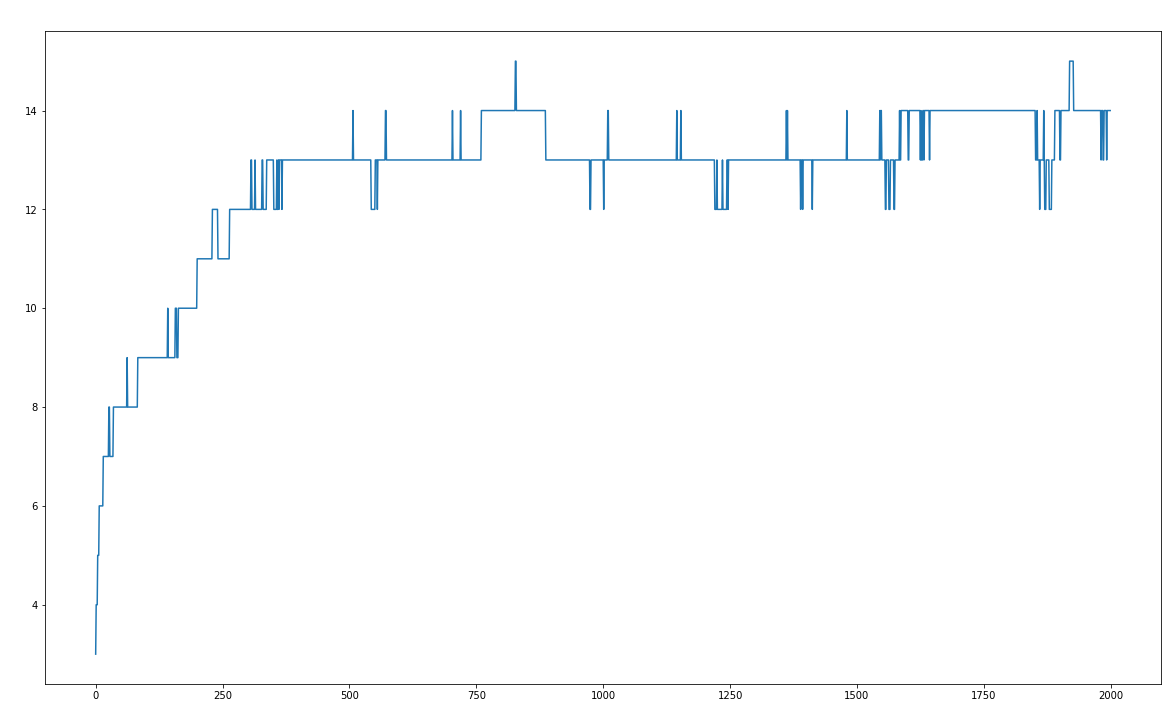

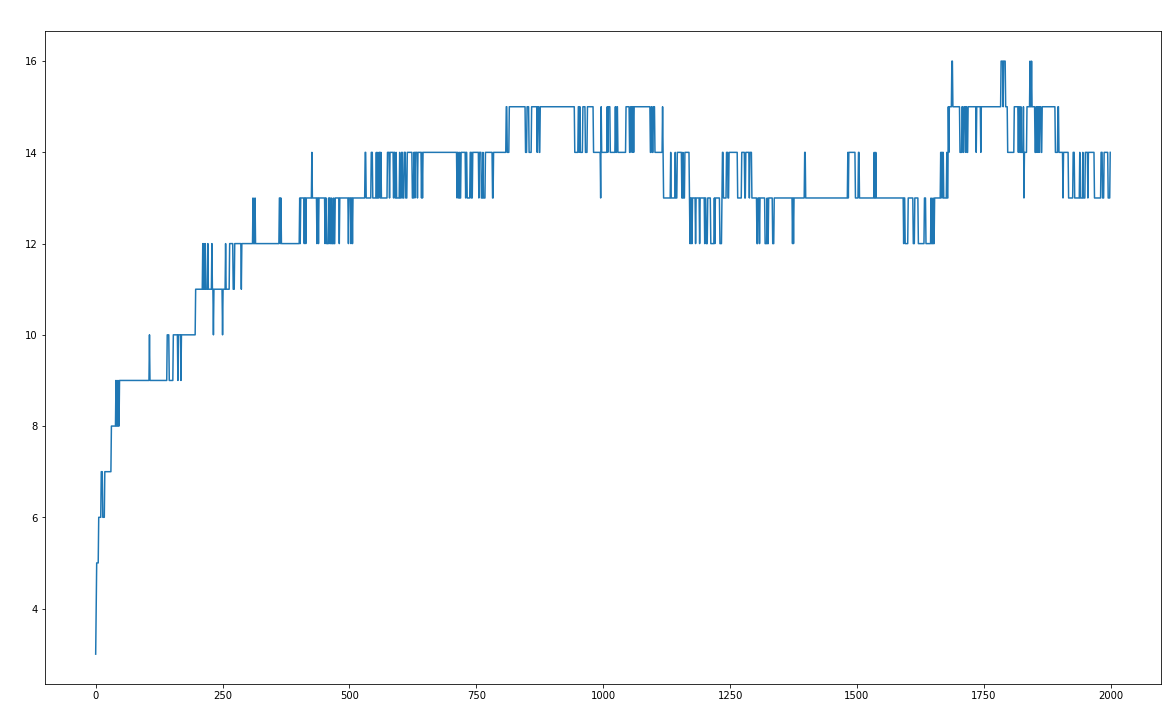

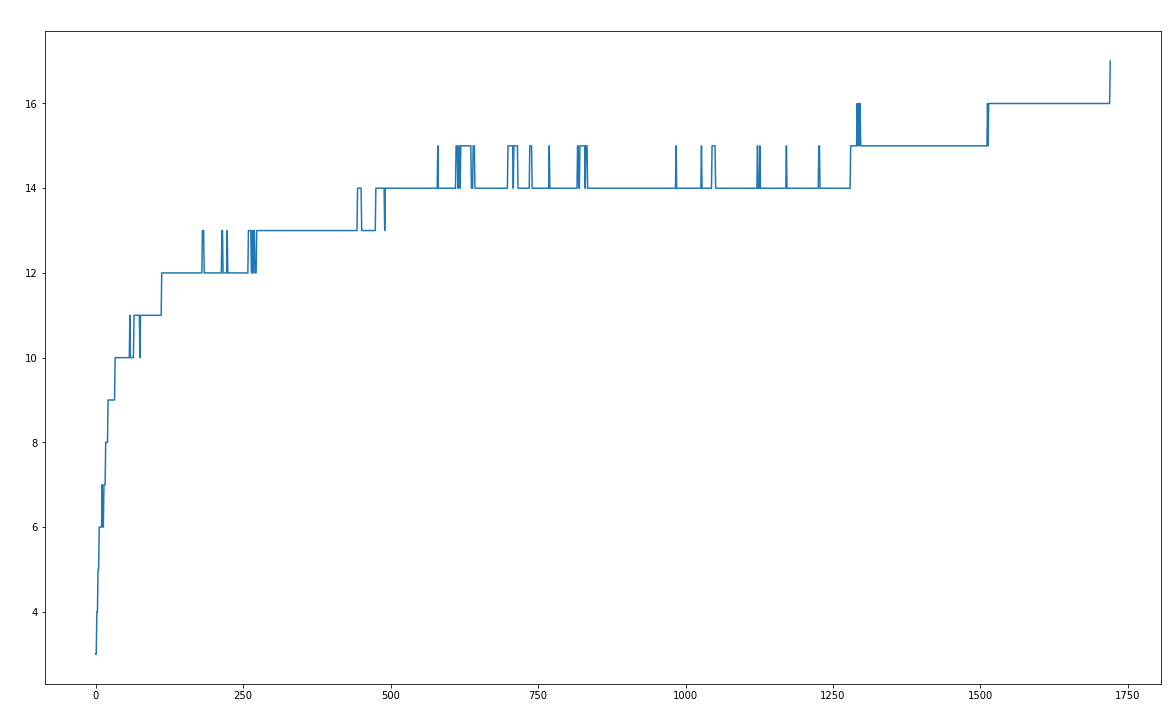

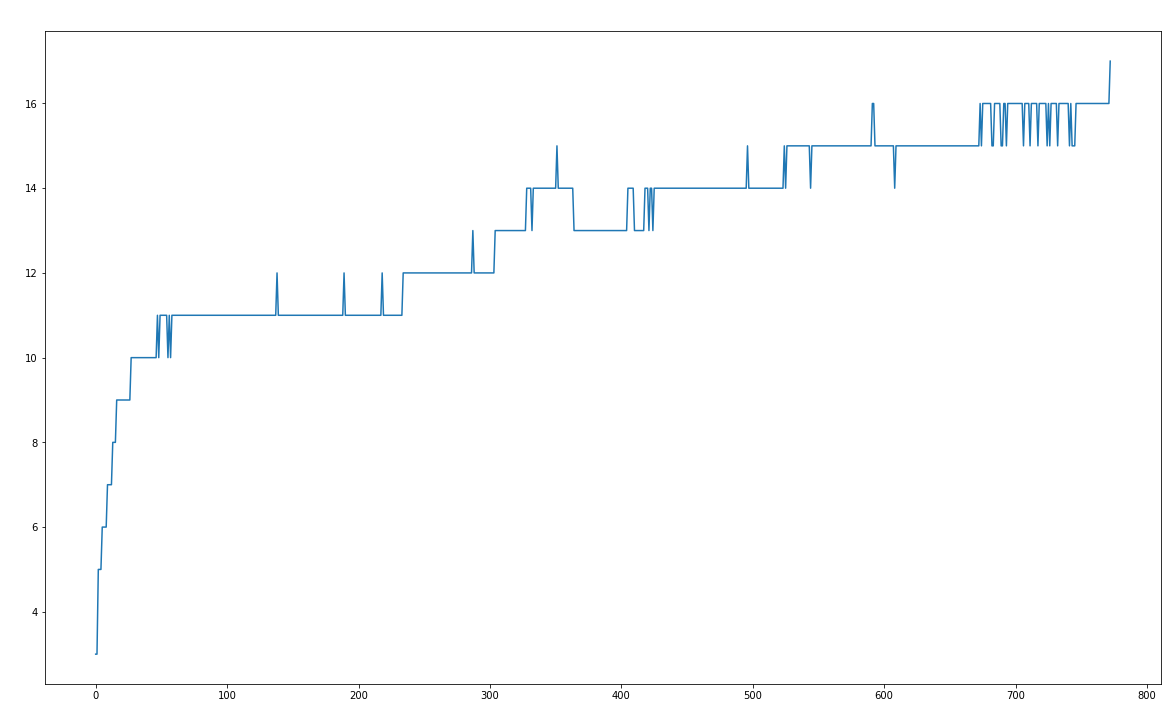

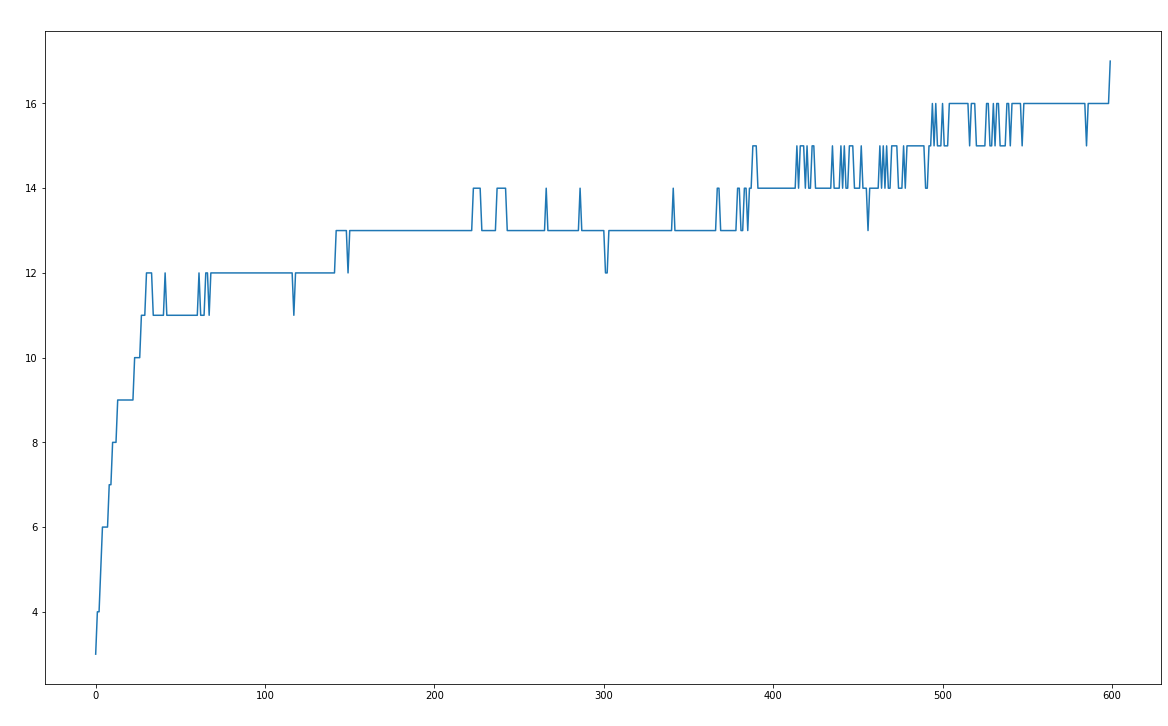

In [0]:

plt.rcParams['figure.figsize'] = (20,12)
pop_sizes = [50, 100]
mutation_txs = [0.07, 0.14, 0.21]

for p in pop_sizes:
  for m in mutation_txs:
    print("\n")
    population = init_population(p, gene_pool, len(target))
    solution, generations,fitness = genetic_algorithm_stepwise(population, fitness_fn, gene_pool, f_thres, ngen, m)
    geracoes = [x for x in range(len(fitness))]
    plt.plot(geracoes, fitness)
    title = 'TAMANHO POPULAÇÃO: '  + str(p) + ', TAXA DE MUTAÇÃO: ' + str(m) 
    plt.title(title,fontdict={'fontsize':20,'color':'white'}) 
    plt.ylabel('Fitness',fontdict={'fontsize':14,'color':'white'})
    plt.xlabel('Geração',fontdict={'fontsize':14,'color':'white'})
    plt.show()
    
    

*Resposta:* A partir dos gráficos acima é possível verificar que a taxa de mutação influenciou a convergir mais rápido. Quando a população inicial era de 100, a senha foi descoberta em menos passos cada vez de aumentava a taxa, quando a população era de 50 ele conseguiu atingir melhores fitness mais rápido ou seja em menos gerações, mas não acertou a senha. Em questão do tamanho da população verifiquei que nos gráficos acima quando a população inicial é maior temos maiores chances de quebrar a senha e de forma mais rápida.

## Atividade Bonus
Implemente uma solução para o problema das 8 rainhas utilizando um algoritmo genético.

In [0]:
## Inclua o seu código aqui